<a href="https://colab.research.google.com/github/JMML2021/0302-Visualitzaci-gr-fica-de-M-ltiples-variables/blob/main/0302_Visualitzacio_grafica_de_Multiples_variables37.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Open the choosen file
df = pd.read_csv(r'https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Data-sources/tips.csv',  delimiter="," , quotechar ='"')
 
df.head

<bound method NDFrame.head of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

# Nivell 1

In [4]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
print('La media de total_bill es: ', round(df.total_bill.mean(),2), '€')

La media de total_bill es:  19.79 €


In [6]:
df.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [7]:
df.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


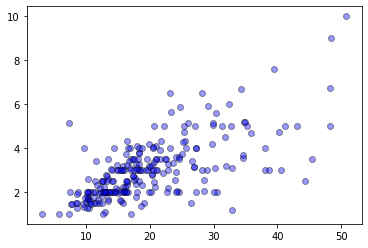

In [8]:
# Plot
x= df['total_bill']
y= df['tip']
colors = 'Blue'

plt.scatter(x, y, c=colors, alpha=0.4, edgecolors='black')

#Scatter plot

#Histograma

Text(0.5, 0, '# Characters (in thousands)')

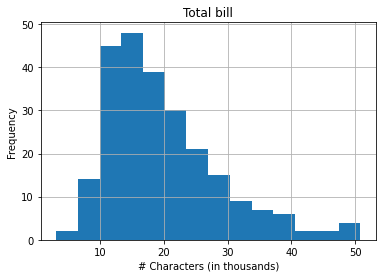

In [9]:
df.hist(['total_bill'], bins=14)
plt.title('Total bill')
plt.ylabel('Frequency')
plt.xlabel('# Characters (in thousands)')

#SUMMARY STATISTICS

In [10]:
print('aqui tienes todos los estadisticos de la base de datos continuos (No discretos)')
df.describe().round(2)

aqui tienes todos los estadisticos de la base de datos continuos (No discretos)


,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [11]:
 desvStd = df.total_bill.std()
print ('desviacion estandar', round(desvStd,3))

desviacion estandar 8.902


In [12]:
print('Para saber el valor de Q1, Q2, IQR:')
(df['total_bill']).describe()

Para saber el valor de Q1, Q2, IQR:


count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

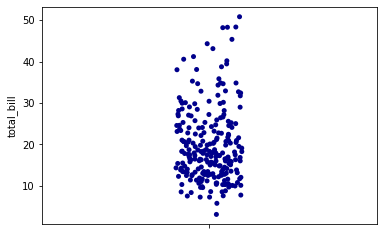

In [13]:
sns.stripplot(y=df["total_bill"], orient='v', color='darkblue')

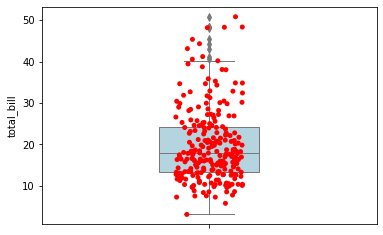

In [14]:
ax = sns.boxplot(y=df["total_bill"], data=df,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=df["total_bill"], orient='v', color='red')

#EXERCISE - 3.8

What percent of the data fall between Q1 and the median?
What percent is between the median and Q3?

EXERCISE - 3.9

estimate the following values for num_char in the  dataset:

a).- Q1

b).- Q3 and

c).- IQR

In [15]:
# calcular el rango intercuartílico  
q3, q1, mediana = np. percentile (df['total_bill'], [75, 25, 50]).round(2)
iqr = q3 - q1
print('Q1: ', q1)
print('Q3: ', q3)
print('mediana: ', mediana)
print('IQR: ', iqr)

Q1:  13.35
Q3:  24.13
mediana:  17.8
IQR:  10.78


In [16]:
tips = df.copy()
tips.tip

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [17]:

tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


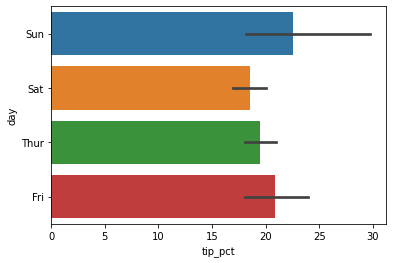

In [18]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

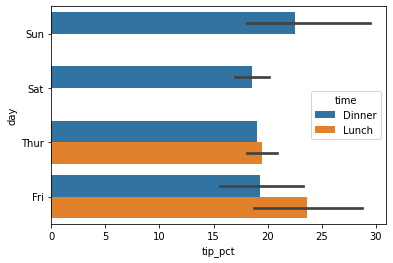

In [19]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

In [20]:
round(tips.describe(include='all'), 1)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.0,244.0,244,244,244,244,244.0,244.0
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.8,3.0,NaN,NaN,NaN,NaN,2.6,20.2
std,8.9,1.4,NaN,NaN,NaN,NaN,1.0,16.3
min,3.1,1.0,NaN,NaN,NaN,NaN,1.0,3.7
25%,13.3,2.0,NaN,NaN,NaN,NaN,2.0,14.8
50%,17.8,2.9,NaN,NaN,NaN,NaN,2.0,18.3
75%,24.1,3.6,NaN,NaN,NaN,NaN,3.0,23.7


In [21]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [22]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

In [23]:
(tips['tip']).median()

2.9

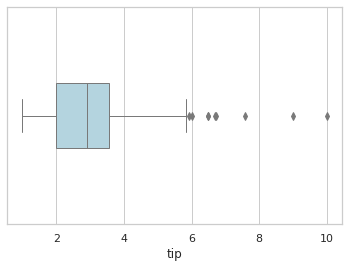

In [24]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

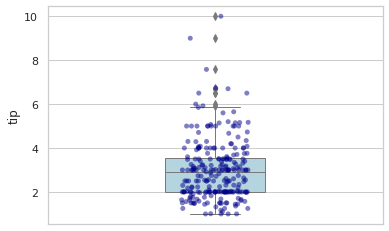

In [25]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

#Una Variable: 1 Numérica = 'tip_pct'

In [26]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
tip_pct       float64
dtype: object

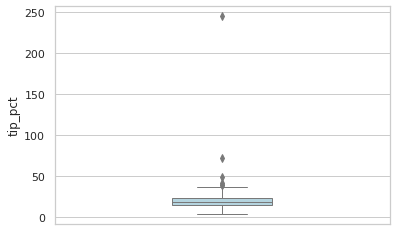

In [27]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

**Dos Variables:** 1 Categórica = 'day', 1 Numérica = 'tip_pct'

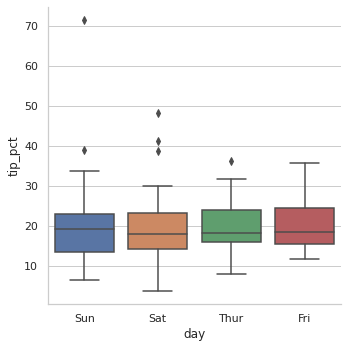

In [28]:
# añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

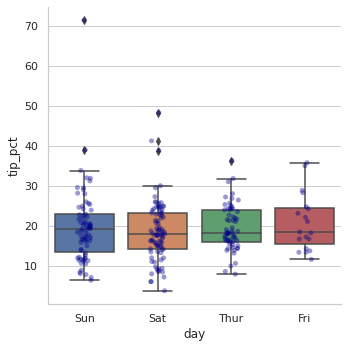

In [29]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

**Tres Variables :** 2 Categóricas = ('day', 'time'), 1 Numérica = 'tip_pct'

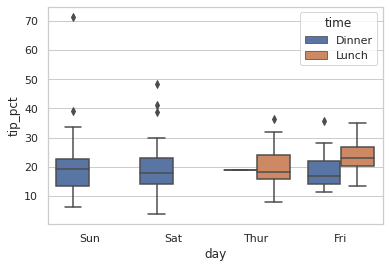

In [30]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

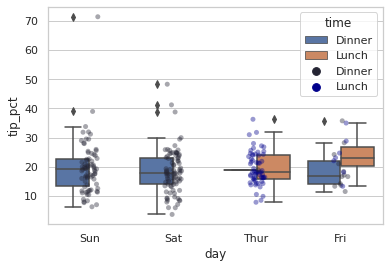

In [31]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

#Facet Grids y Categorical DataFrame
Nos permite profundizar todavía más en el analysis, añadiendo una variable categórica adicional.

Usando el método factorplot( ) de "Facet Grid" :

Cuatro Variables **texto en negrita** : 3 Categoricas = ('day', 'time', 'smoker'), 1 Numérica = 'tip_pct'

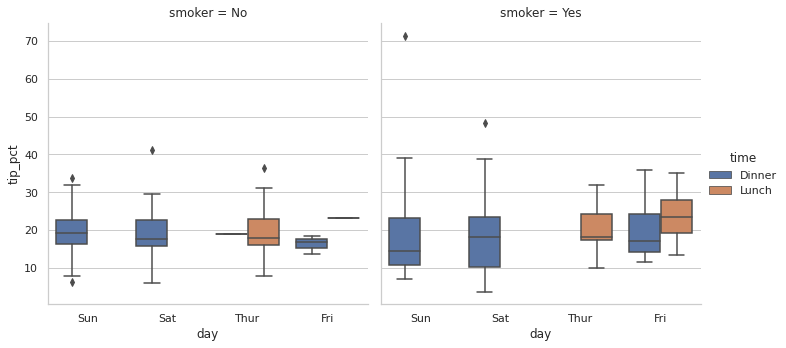

In [32]:

sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

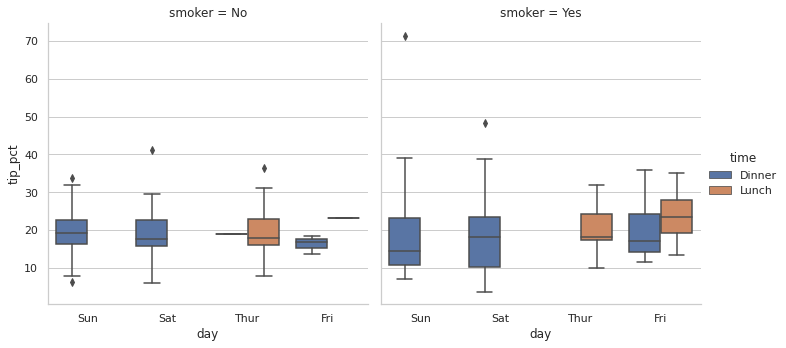

In [33]:

sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

# Nivell 2

# Exercici 2
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

# Nueva sección

In [34]:
# Open the choosen file
titulo = ['Id', 'Titulo', 'Tipo']
df = pd.read_csv(r'https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Pre-processing-data/movies.dat',  delimiter='::', engine='python' , header=None, names= titulo, encoding='latin-1')

#df[['A', 'B']] = pd.DataFrame(df['Titulo Año'].str.split(pat='(', expand= True)) 

#df = pd.DataFrame(df['Titulo Año'].str.split('(',1).tolist())
df.head(4)

,Id,Titulo,Tipo
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama


In [35]:
df.shape
df['year'] = df["Titulo"].str[-5:-1]

In [36]:
# Divido la fecha
df['Titulo'].str.split('(', expand= True)
df['Anyo'] = df['Titulo'].str[-5:-1]
#df['lonfitud'] = df['Titulo'].len()
df['Anyo'] = df['Anyo'].astype('float64')




df

,Id,Titulo,Tipo,year,Anyo
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1995.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995,1995.0
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,2000.0
3879,3949,Requiem for a Dream (2000),Drama,2000,2000.0
3880,3950,Tigerland (2000),Drama,2000,2000.0
3881,3951,Two Family House (2000),Drama,2000,2000.0


In [37]:
df['Anyo']= pd.DataFrame(df['Anyo'].unique())
print()
df= df.sort_values('Anyo')
df.describe()
df

,Id,Titulo,Tipo,year,Anyo
77,78,"Crossing Guard, The (1995)",Drama,1995,1919.0
79,80,"White Balloon, The (Badkonake Sefid ) (1995)",Drama,1995,1920.0
80,81,Things to Do in Denver when You're Dead (1995),Crime|Drama|Romance,1995,1921.0
70,71,Fair Game (1995),Action,1995,1922.0
75,76,Screamers (1995),Sci-Fi|Thriller,1995,1923.0
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,NaN
3879,3949,Requiem for a Dream (2000),Drama,2000,NaN
3880,3950,Tigerland (2000),Drama,2000,NaN
3881,3951,Two Family House (2000),Drama,2000,NaN


In [38]:
genres = [
    "Action",
    "Adventure",
    "Animation",
    "Children's",
    "Comedy",
    "Crime",
    "Documentary",
    "Drama",
    "Fantasy",
    "Film-Noir",
    "Horror",
    "Musical",
    "Mystery",
    "Romance",
    "Sci-Fi",
    "Thriller",
    "War",
    "Western",
]

In [39]:
# Creo columnas con el tipo de pelicula que es
for genre in genres:
    df[genre] = df["Tipo"].apply(
        lambda values: int(genre in values.split("|"))
    )
df.head(0)

,Id,Titulo,Tipo,year,Anyo,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


In [40]:
estilos =pd.DataFrame(df.sum())

# Quito las columnas primeras porque no son numericas 
estilos = estilos[2:].copy()
estilos

,0
Tipo,DramaDramaCrime|Drama|RomanceActionSci-Fi|Thri...
year,1995199519951995199519961995199519961995199519...
Anyo,158755.0
Action,503
Adventure,283
Animation,105
Children's,251
Comedy,1200
Crime,211
Documentary,127


In [41]:
estilos.shape

estilos = estilos.rename_axis('genero').reset_index()
print(estilos)

         genero                                                  0
0          Tipo  DramaDramaCrime|Drama|RomanceActionSci-Fi|Thri...
1          year  1995199519951995199519961995199519961995199519...
2          Anyo                                           158755.0
3        Action                                                503
4     Adventure                                                283
5     Animation                                                105
6    Children's                                                251
7        Comedy                                               1200
8         Crime                                                211
9   Documentary                                                127
10        Drama                                               1603
11      Fantasy                                                 68
12    Film-Noir                                                 44
13       Horror                                               

In [42]:
df3 = df.copy()

Index(['genero', 'cantidad'], dtype='object')


count        19.0
mean       8692.8
std       36341.4
min          44.0
25%         110.0
50%         251.0
75%         481.5
max      158755.0
Name: cantidad, dtype: float64

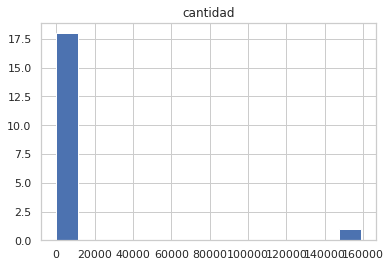

In [43]:
# Cambio el nombre de las columnas

df3 = estilos.rename(columns ={0:'cantidad'})
print(df3.columns)
# Quito lo primera fila que es el nombre de la primera pelicula
df3=df3.drop(0)   
df3=df3.drop(1)   
df3 = df3.sort_values('cantidad', ascending = False)

df3['cantidad'] = df3['cantidad'].astype('float64')

df3.hist(['cantidad'], bins=14)
df3['cantidad'].describe().round(1)

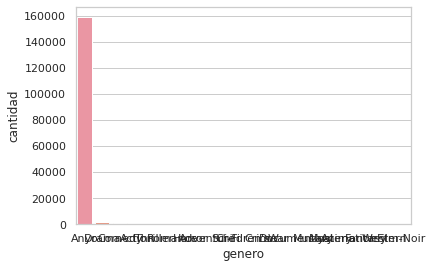

In [44]:
sns.barplot(x='genero', y='cantidad', data=df3)

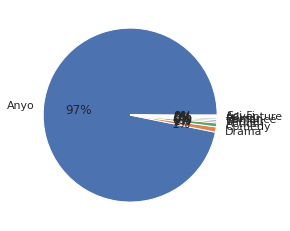

Principales 8 gneros


In [45]:
#create pie chart
df33=df3[0:9]
plt.pie(df33['cantidad'], labels = df33['genero'], autopct='%.0f%%')
plt.show()
print('Principales 8 gneros')

In [46]:
df3


,genero,cantidad
2,Anyo,158755.0
10,Drama,1603.0
7,Comedy,1200.0
3,Action,503.0
18,Thriller,492.0
16,Romance,471.0
13,Horror,343.0
4,Adventure,283.0
17,Sci-Fi,276.0
6,Children's,251.0


In [47]:
dfAnyos = df['Anyo'].unique()
dfAnyos

array([1919., 1920., 1921., 1922., 1923., 1925., 1926., 1927., 1928.,
       1929., 1930., 1931., 1932., 1933., 1934., 1935., 1936., 1937.,
       1938., 1939., 1940., 1941., 1942., 1943., 1944., 1945., 1946.,
       1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954., 1955.,
       1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963., 1964.,
       1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973.,
       1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982.,
       1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991.,
       1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000.,
         nan])

In [48]:
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

# Listo por años

In [49]:
df6 =pd.DataFrame(df.groupby(by =['Anyo']).sum().reset_index())
df6.columns
df6.head

<bound method NDFrame.head of       Anyo  Id  Action  Adventure  Animation  Children's  Comedy  Crime  \
0   1919.0  78       0          0          0           0       0      0   
1   1920.0  80       0          0          0           0       0      0   
2   1921.0  81       0          0          0           0       0      1   
3   1922.0  71       1          0          0           0       0      0   
4   1923.0  76       0          0          0           0       0      0   
..     ...  ..     ...        ...        ...         ...     ...    ...   
76  1996.0   3       0          0          0           0       1      0   
77  1997.0  37       0          0          0           0       0      0   
78  1998.0  42       1          0          0           0       0      1   
79  1999.0  77       0          0          0           0       0      0   
80  2000.0  79       0          0          0           0       0      0   

    Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery 

In [50]:
df6

,Anyo,Id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1919.0,78,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1920.0,80,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1921.0,81,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3,1922.0,71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1923.0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1996.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
77,1997.0,37,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
78,1998.0,42,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
79,1999.0,77,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [51]:
t = df6['Adventure'].sum()
#df6
total=0
for x in genres:
    print(x, df[x].sum())
    total+=df[x].sum()  

Action 503
Adventure 283
Animation 105
Children's 251
Comedy 1200
Crime 211
Documentary 127
Drama 1603
Fantasy 68
Film-Noir 44
Horror 343
Musical 114
Mystery 106
Romance 471
Sci-Fi 276
Thriller 492
War 143
Western 68


# Sumo por géneros

# Convertir el índice en una columna y cuento por año:

In [52]:


genres_year = df.iloc[:, 3:].groupby("year").sum().loc[:,:]

genres_year = genres_year.reset_index()
genres_year 


,year,Anyo,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1919,0.0,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
1,1920,0.0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1921,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1922,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,1923,0.0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1996,17610.0,37,22,7,20,115,23,19,150,5,2,12,7,6,48,14,45,8,1
77,1997,0.0,43,22,6,22,98,26,11,139,6,2,10,5,15,52,18,55,10,0
78,1998,0.0,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,5,1
79,1999,0.0,27,7,7,11,103,12,15,130,2,0,14,1,5,37,15,40,4,1


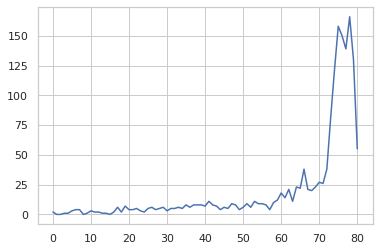

In [53]:
genres_year['Drama'].plot()

# Dibujo la evolucion de todos los estilos

In [54]:
genres_year.groupby('year').plot(x= 'year', y = 'generoA', ax=ax, legend=False)

KeyError: ignored

In [ ]:
#define plotting region (2 rows, 2 columns)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(5, 5)
#fig.set_size_inches(18,68)

for x, generoA in enumerate ( genres):
    
   
    columna = x % 5
    fila =  int(x/5) 
    print(fila, columna)
    ax[fila, columna].plot(x= genres_year.year, y= genres_year[generoA])
plt.show() 

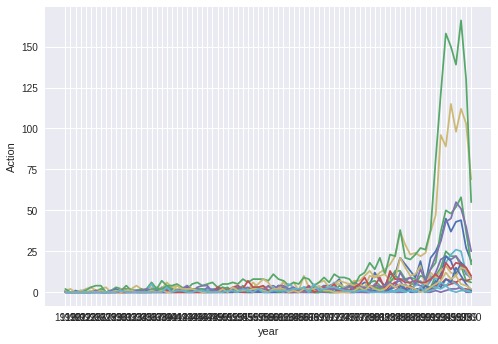

In [125]:
sns.figsize = ( 45, 28)
figsize = (90,80)
for x, generoA in enumerate ( genres):

  sns.lineplot(x = 'year', y = generoA, data = genres_year )

In [69]:
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

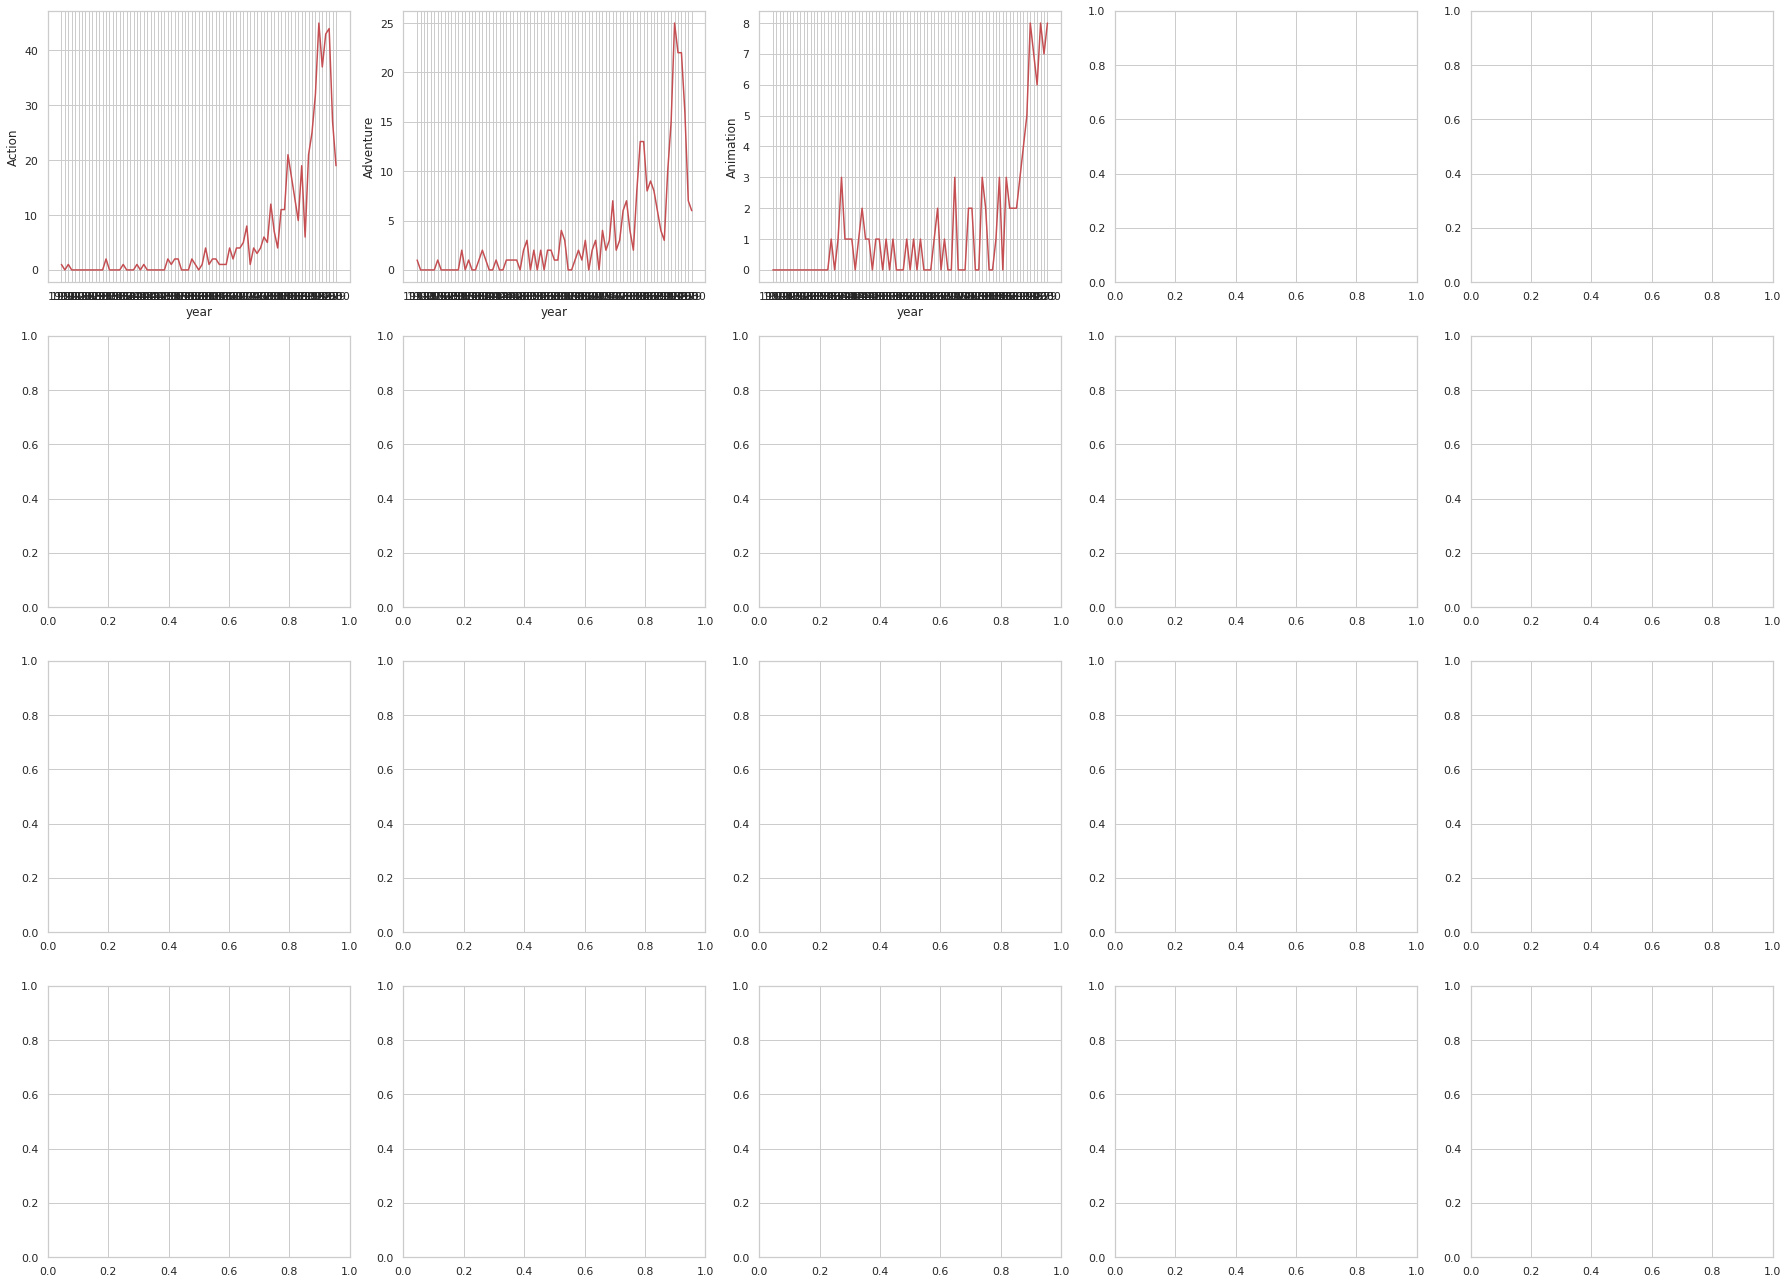

In [73]:
fig,ax =  plt.subplots( 4, 5, 
                       figsize = ( 25, 18))

for x, generoA in enumerate ( genres):
  # Agrego un título
  #ax[1].set_title(generoA)
  if x < 3:
      columna = x % 5
      fila =  int(x/5) 
      #print(fila, columna)


      sns.lineplot( x = "year", y = generoA,  
              color = 'r', data = genres_year ,  
              ax = ax[fila][columna]) 
      #ax.tick_params(labelrotation = 45) 
      fig.tight_layout()
    

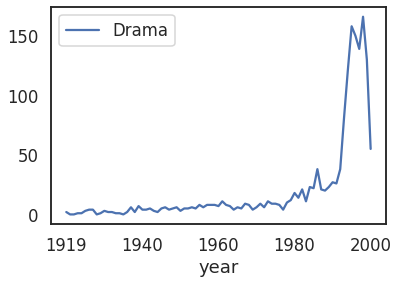

In [75]:
genres_year .plot('year', 'Drama')

plt.show()

<Figure size 10800x10800 with 0 Axes>

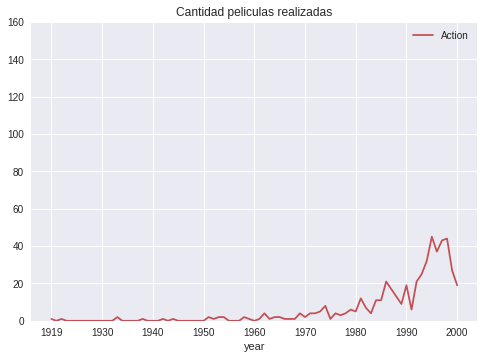

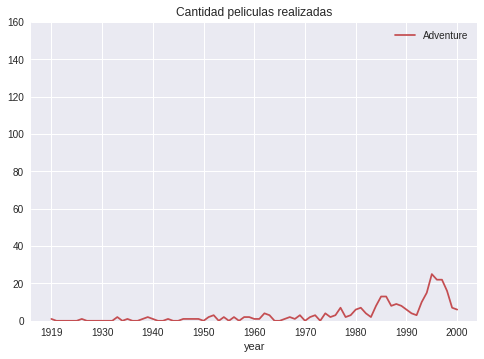

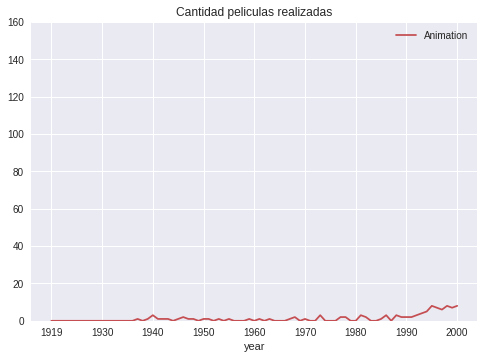

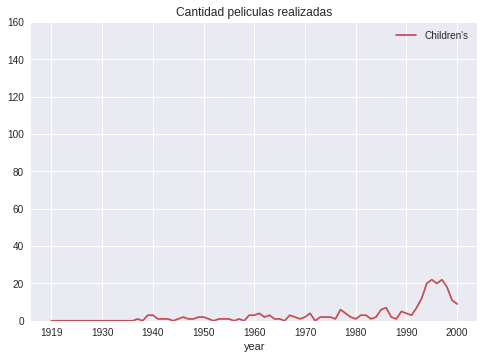

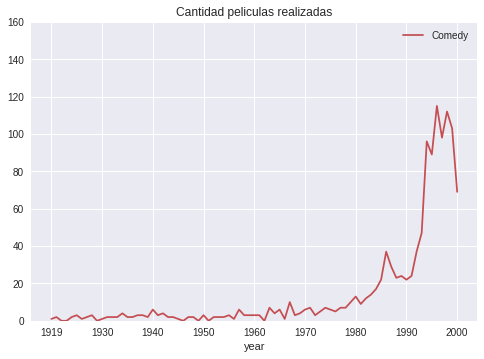

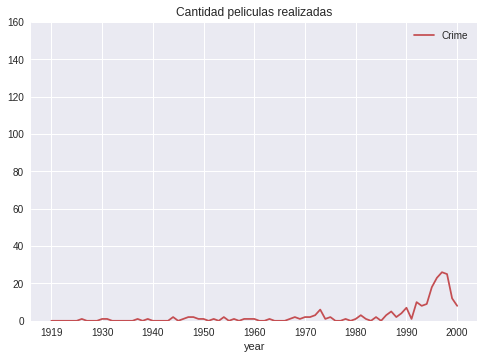

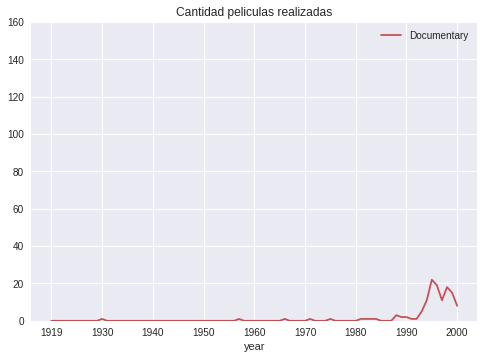

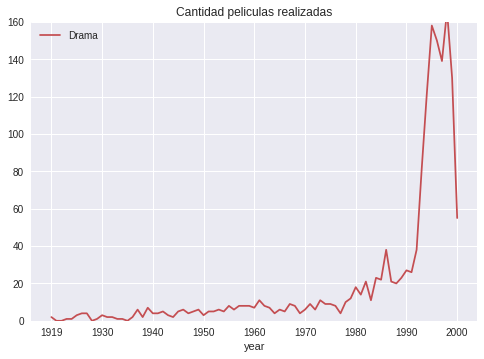

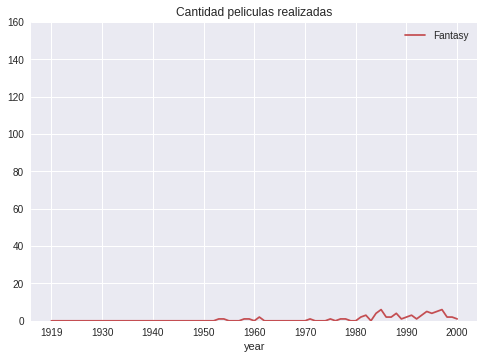

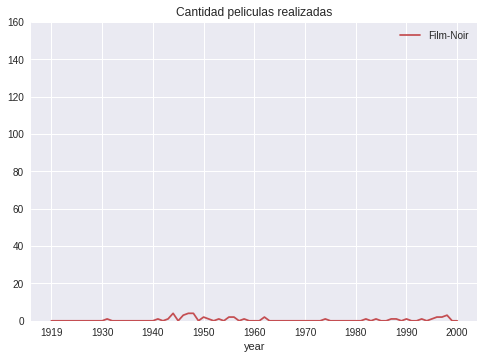

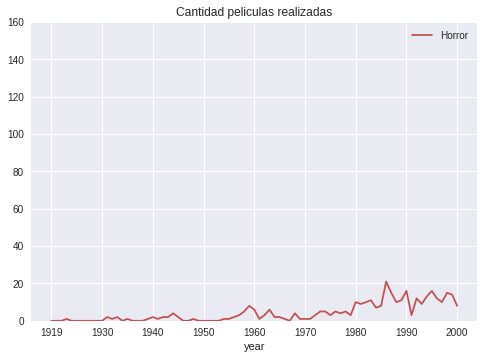

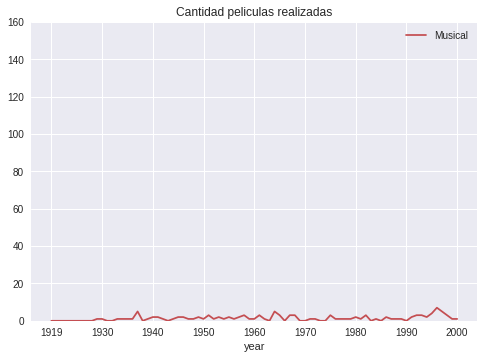

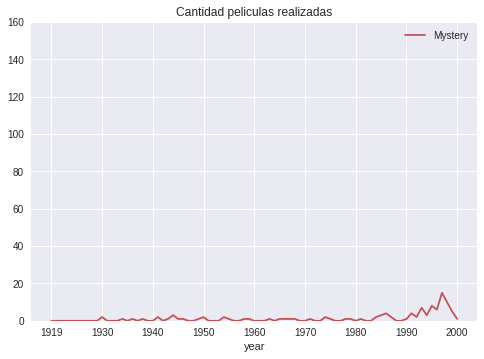

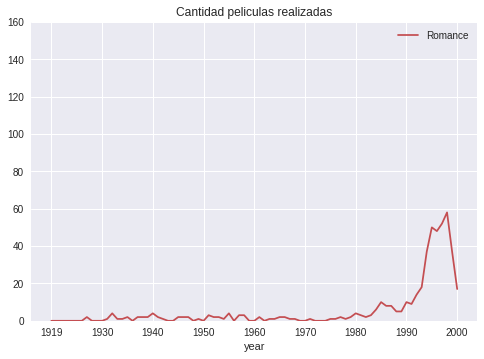

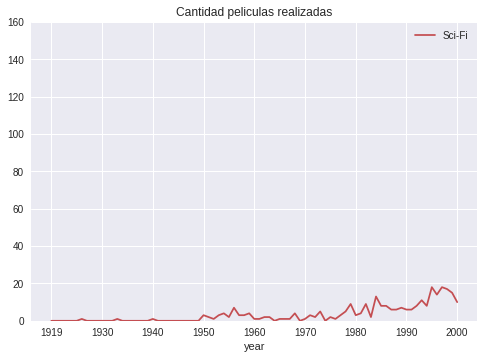

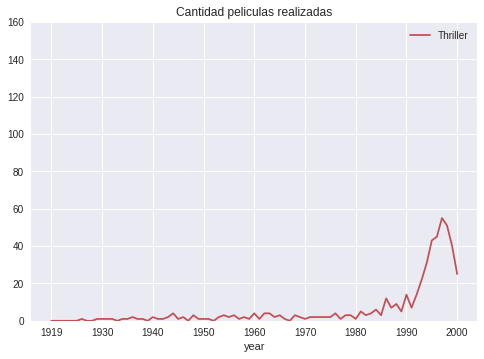

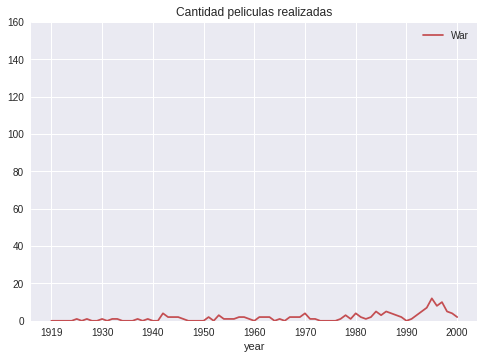

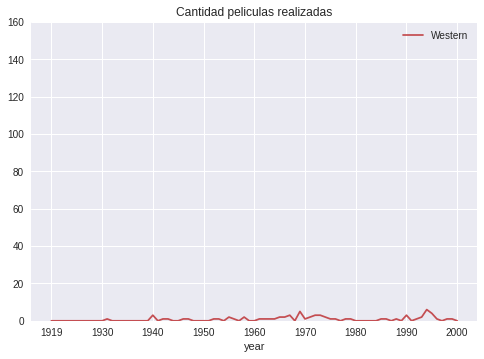

In [168]:
fig = plt.figure(figsize= (150,150))
fig.tight_layout()
plt.style.use('seaborn')


for x, generoA in enumerate ( genres):
  columna = x % 5
  fila =  int(x/5) 
  #sns.ecdfplot(data = genres_year, x = genres_year.year, hue=generoA)
  genres_year .plot('year', generoA, title=('Cantidad peliculas realizadas'), ylim =[0, 160], color = 'r') #, mcolors=colores[x])
  #plt.xlim([-5, 40])
  plt.show()

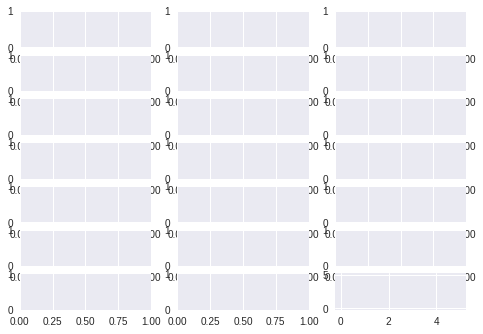

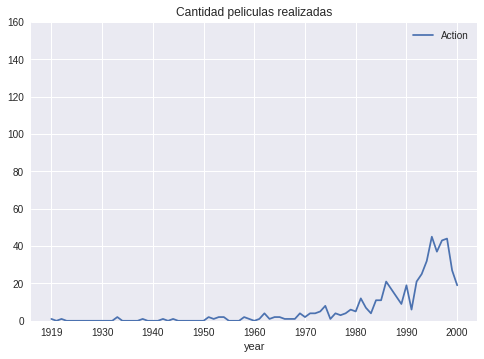

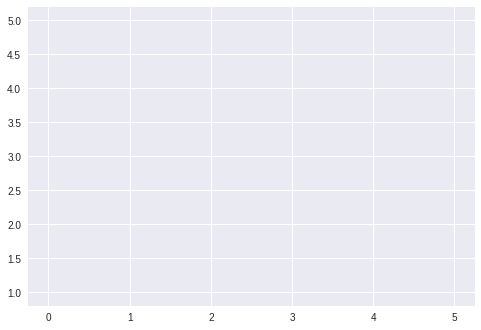

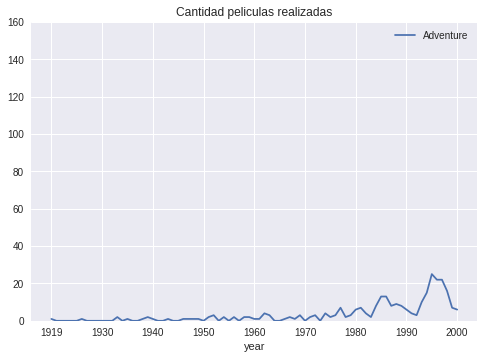

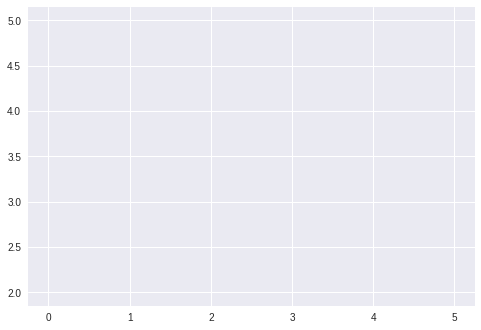

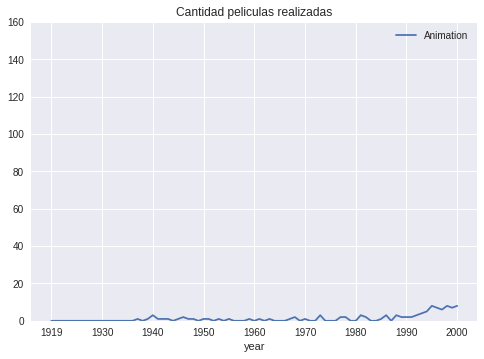

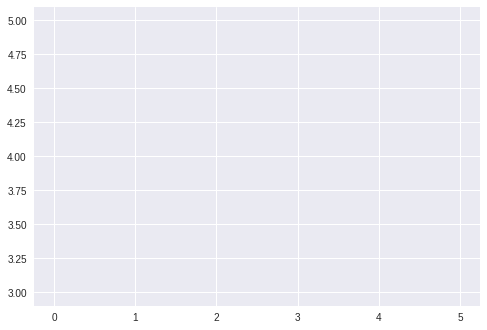

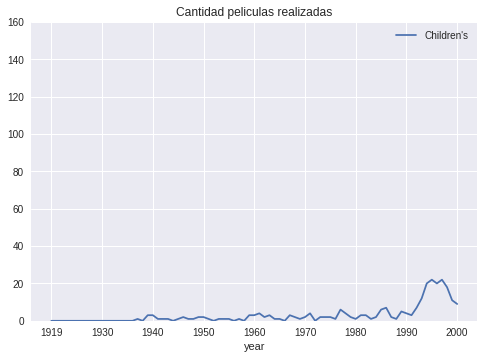

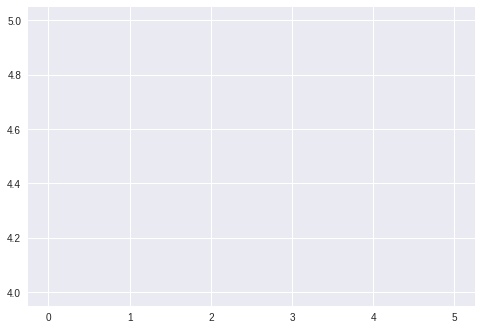

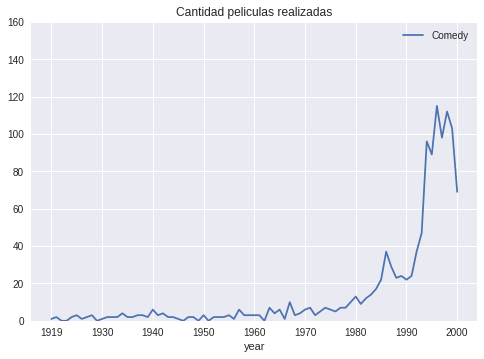

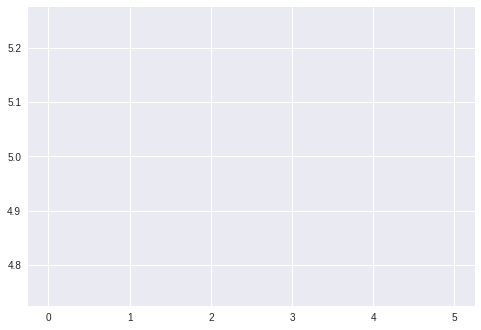

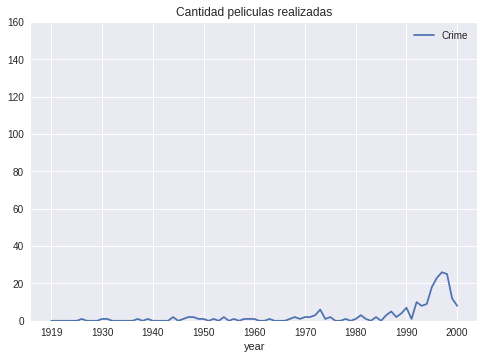

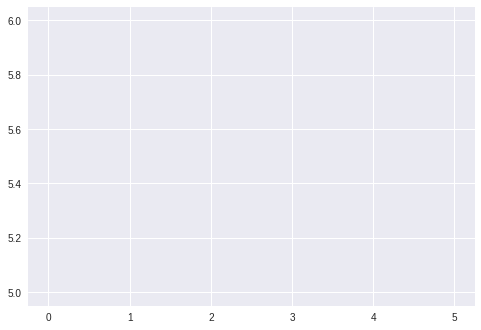

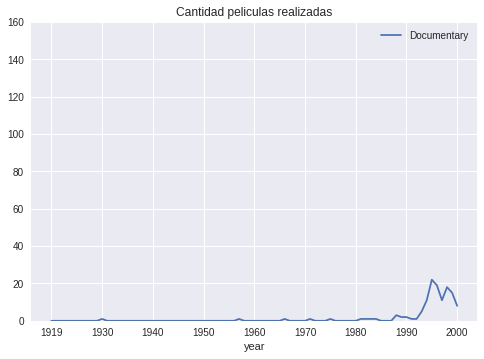

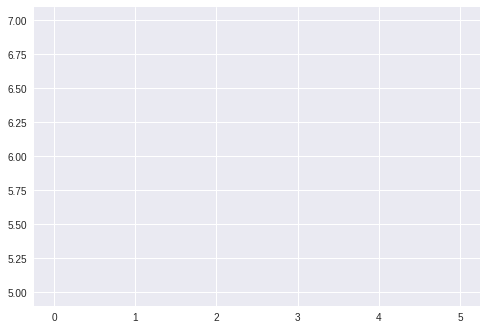

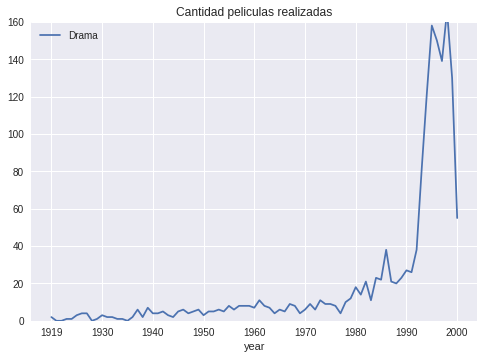

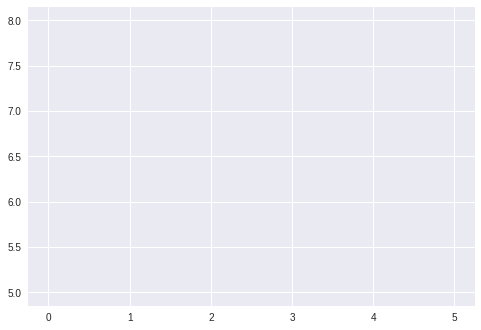

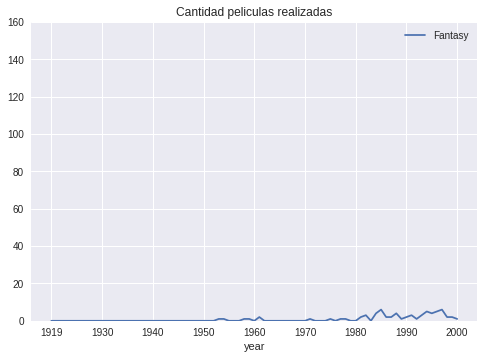

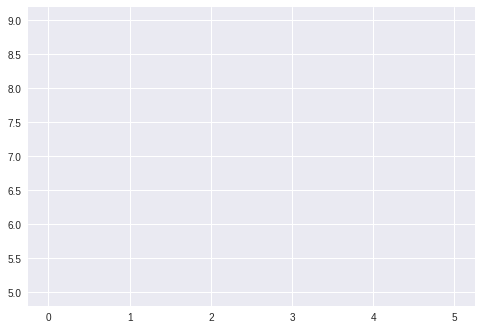

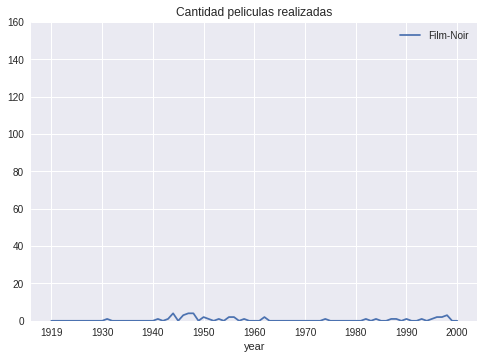

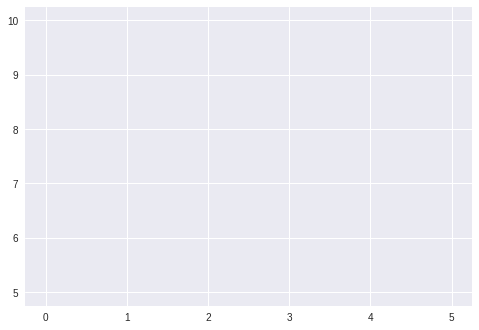

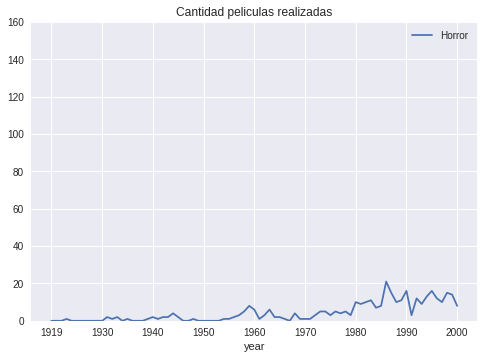

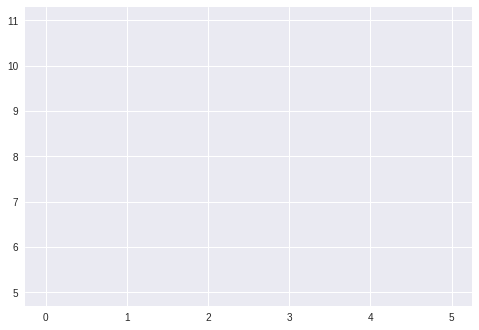

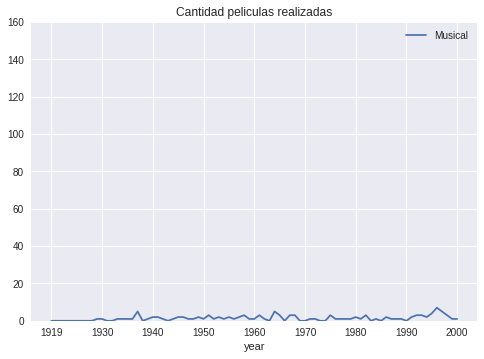

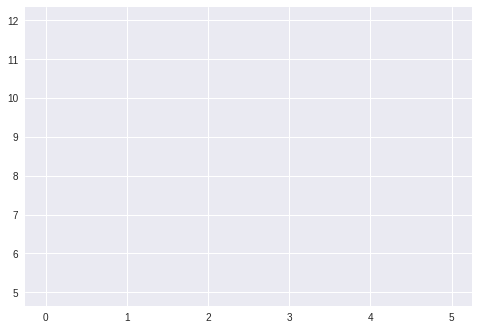

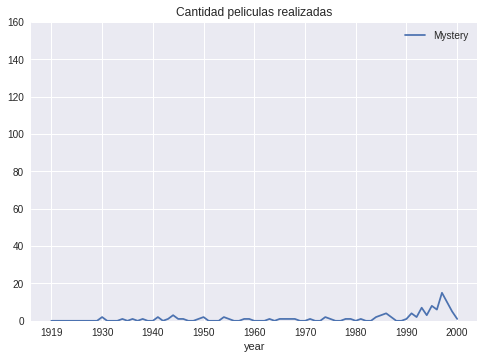

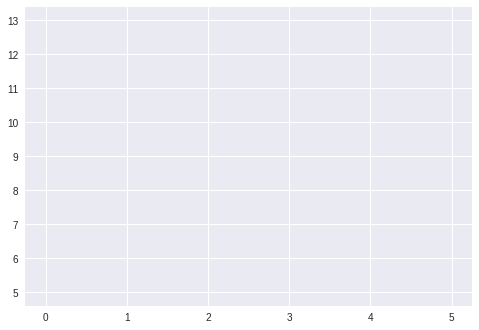

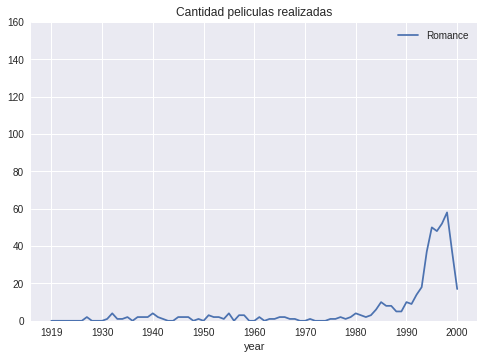

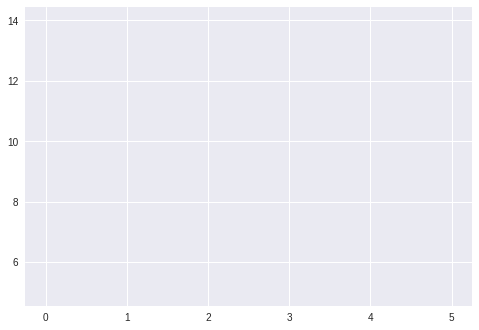

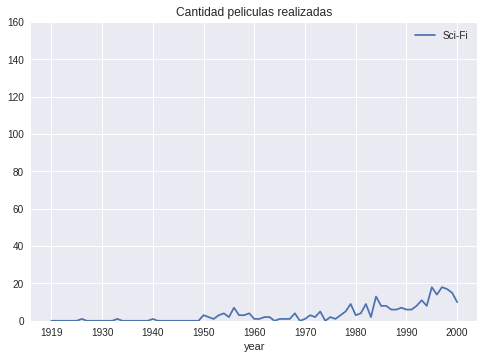

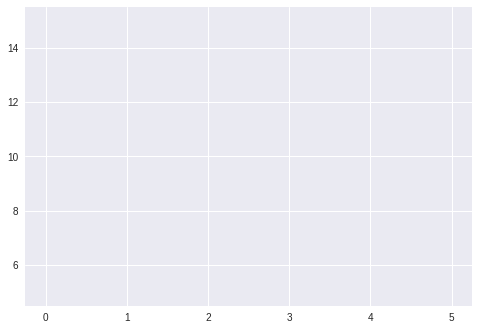

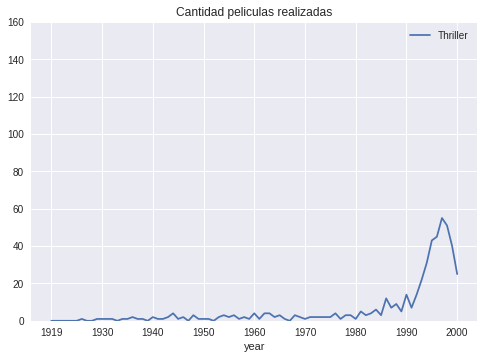

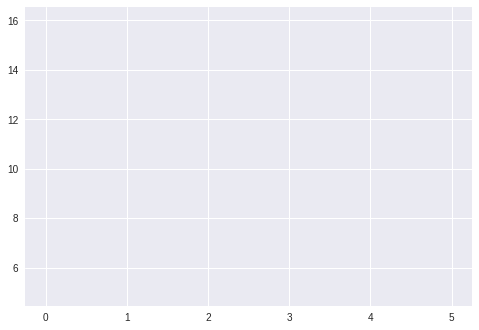

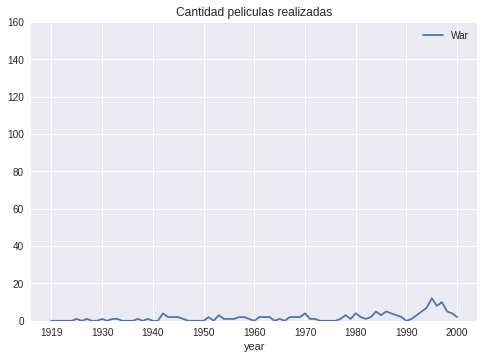

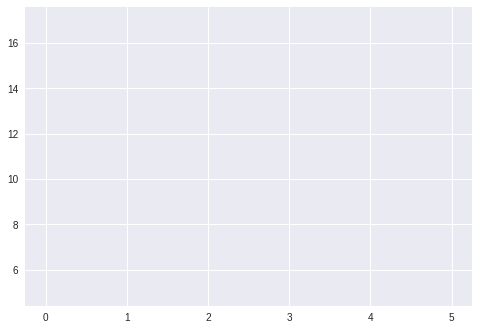

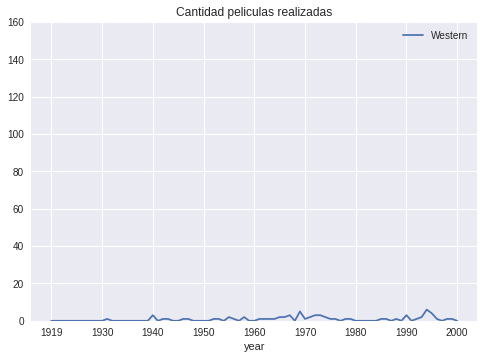

In [139]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(7,3)

for x, generoA in enumerate ( genres):
  columna = x % 5
  fila =  int(x/5) 
  ax=plt.plot(5,5,x)
  #sns.ecdfplot(data = genres_year, x = genres_year.year, hue=generoA)
  genres_year.plot('year', generoA, title=('Cantidad peliculas realizadas'), ylim =[0, 160]) #, mcolors=colores[x])
  #plt.xlim([-5, 40])
  plt.show()


In [151]:
#fig, ax = plt.subplots(7,3)

fig, ax = plt.subplot(5, 2, figsize=(10,4))
ax.plot(genres_year.Drama)

#
#for x, generoA in enumerate ( genres):
  #columna = x % 5
  ##fila =  int(x/5) 
  #ax=plt.plot(5,5,x)
  #ax.plot(genres_year['year'].Drama)
  #sns.ecdfplot(data = genres_year, x = genres_year.year, hue=generoA)
  #genres_year.plot('year', generoA, title=('Cantidad peliculas realizadas'), ylim =[0, 160]) #, mcolors=colores[x])
  #plt.xlim([-5, 40])
  #plt.show()

ValueError: ignored

<Figure size 576x396 with 0 Axes>

In [167]:
ax.plot(genres_year['Drama'])


AttributeError: ignored

In [164]:
genres_year['Drama']

0       2
1       0
2       0
3       1
4       1
     ... 
76    150
77    139
78    166
79    130
80     55
Name: Drama, Length: 81, dtype: int64